# Introduction

## Setting up

In [1]:
%%capture  
# Import notebook containing the imports the functions and the dataset
%run "./0. Imports and functions.ipynb"

# Import notebook containing sampled dataset
%run "./1. Overview and sampling.ipynb"

# Education and previous formation

## Levels of education 

The education questions is tight to each countries as each of them have their own educative system. Therefore this section is separated between all countries.
All of them had the same question:
* What is the highest level of education you have attained?
But the list of diploma was different for each. 
If a participant answered from another country than the one listed at the beginning of the notebook, they could answer with a free text.

In [2]:
# Create a separated df for following sections
df_edu_per_country = df[df['Year'] == 2018][['Country', 'edu1. What is the highest level of education you have attained?']].copy()
df_edu_per_country.columns = ['Country', 'Education']

### Australia

In [3]:
# Set up variables
country = 'Australia'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for Australia,,
AQF 10 - Doctoral Degree,62,63.92
AQF 8 - Bachelor Honours Degree / Graduate Certificate / Graduate Diploma,13,13.40
AQF 7 - Bachelor Degree,11,11.34
AQF 9 - Masters Degree,11,11.34


### Germany

In [4]:
# Set up variables
country = 'Germany'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for Germany,,
Master degree,168,50.76
Doctorate,133,40.18
Undergraduate degree,19,5.74
"Final secondary-school examinations, general qualification for university entrance",7,2.11
Other,4,1.21


### Netherlands

In [5]:
# Set up variables
country = 'Netherlands'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for Netherlands,,
PhD,23,47.92
WO (Wetenschappelijk onderwijs) Master,18,37.50
WO (Wetenschappelijk onderwijs) Bachelor,3,6.25
HBO (Hoger beroepsonderwijs) Master,3,6.25
HBO (Hoger beroepsonderwijs) Bachelor,1,2.08


### New Zealand

In [6]:
# Set up variables
country = 'New Zealand'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for New Zealand,,
Doctorate,14,37.84
Master degree,10,27.03
Undergraduate degree,10,27.03
"Further Education (NVQ A-Level, ...)",2,5.41
Other,1,2.70


### South Africa

In [7]:
# Set up variables
country = 'South Africa'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for South Africa,,
Doctorate,7,30.43
Master degree,6,26.09
Undergraduate degree,6,26.09
"Further Education (NVQ A-Level, ...)",2,8.70
Other,2,8.70


### United Kingdom

In [8]:
# Set up variables
country = 'United Kingdom'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for United Kingdom,,
Doctorate,165,70.51
Master degree,48,20.51
Undergraduate degree,20,8.55
GSCEs,1,0.43


### United States

In [9]:
# Set up variables
country = 'United States'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for United States,,
Doctorate,67,45.58
Master degree,46,31.29
Undergraduate degree,33,22.45
Other,1,0.68


### Rest of the World

In [10]:
# Set up variables
country = 'World'
index_name = 'Highest level of education for {}'.format(country)

# Get the count for edu1
df_edu = df_edu_per_country[df_edu_per_country['Country'] == country]['Education'].value_counts().to_frame()

# Add the percentage to the newly created df
df_edu['Percentage'] = (df_edu['Education'] / df_edu['Education'].sum()*100).round(2)

# Rename columns
df_edu.columns = ['Total count', 'Percentage']

# Change name of index 
df_edu.index.name = index_name

# Display the df
df_edu

,Total count,Percentage
Highest level of education for World,,
PhD,21,40.38
Masters,3,5.77
Ph.D.,3,5.77
Msc,2,3.85
PhD,2,3.85
Phd,2,3.85
Postgraduate degree,1,1.92
PhD in progress,1,1.92
Bachelor's degree,1,1.92


### Comparison between countries

Even if the countries have different education levels, it is possible to match them on the common "Doctorate" and "Master degree". 
Therefore we compare them with these two equivalent levels and merge all others under the category "other".

In [11]:
# Create dictionary to replace values. These values may not be present in the current df but are present in the
# potential answers
dict_values = {'PhD': 'Doctorate', 
               'AQF 10 - Doctoral Degree': 'Doctorate',
               'HBO (Hoger beroepsonderwijs) Master': 'Master degree',
               'WO (Wetenschappelijk onderwijs) Master': 'Master degree',
               'AQF 9 - Masters Degree': 'Master degree'}
list_value_to_keep = ['Doctorate', 'Master degree', np.NaN]

# Replace the value in education
df_edu_per_country['Education'] = df_edu_per_country['Education'].replace(dict_values)

# Create a new columns if "World" if the country is not in the list
def merge_edu(x):
    if x in list_value_to_keep:
        return x
    elif x == np.NaN:
        return x
    else:
        return 'Other'
    
# Apply the function to a new columns
df_edu_per_country['Level of education'] = df_edu_per_country['Education'].apply(merge_edu)

# Count the values per countries
df_edu_comparison = df_edu_per_country.groupby('Country')['Level of education'].value_counts().rename('Total count').reset_index()

# Add a percentage of each type of diploma per countries
df_edu_comparison['Percentage per countries'] = (df_edu_comparison['Total count'] / df_edu_comparison.groupby('Country')['Total count'].transform('sum')*100).round(2)

# Display the results
df_edu_comparison

,Country,Level of education,Total count,Percentage per countries
0,Australia,Doctorate,62,63.92
1,Australia,Other,24,24.74
2,Australia,Master degree,11,11.34
3,Germany,Master degree,168,50.76
4,Germany,Doctorate,133,40.18
5,Germany,Other,30,9.06
6,Netherlands,Doctorate,23,47.92
7,Netherlands,Master degree,21,43.75
8,Netherlands,Other,4,8.33
9,New Zealand,Doctorate,14,37.84


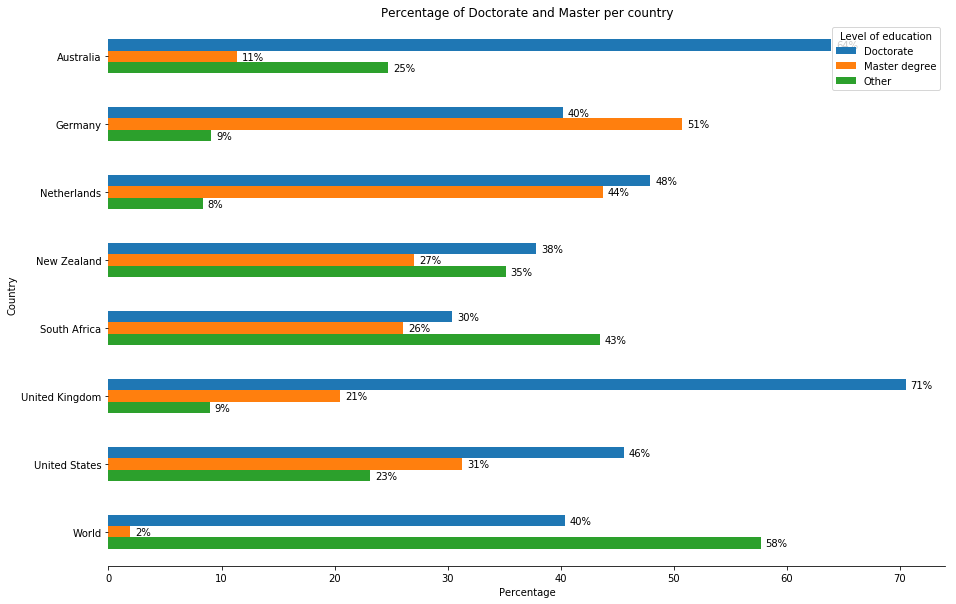

In [12]:
fig, ax = plt.subplots()
df_plot = df_edu_comparison.pivot(index='Country', 
                        columns='Level of education', 
                        values='Percentage per countries')
df_plot.plot(kind='barh',
                  title='Percentage of Doctorate and Master per country',
                  grid=False, ax=ax)

ax.set(xlabel="Percentage", ylabel="Country")

ax.invert_yaxis()  # when barh option, the bars are inverted 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) 
for p in ax.patches:
    if int(round(p.get_width())) > 0:
        ax.annotate('{}%'.format(str(int(round(p.get_width())))), 
                                 (p.get_x() + p.get_width(), p.get_y()), 
                                  xytext=(5, -9),
                                  textcoords='offset points')
plt.show();

## Academic field for education and professional development

Alongside of question about education level we also asked the participants in which field they finished their highest level of education. 
Here again the propositions were specific to each countries.

In [13]:
# Create a column that merge all education columns
df_edu_field = df[['Year', 'Country']].copy()

# There are numbers in some of the fields, removing them as they are not needed
def remove_digit(s):
    try:
        return ''.join([i for i in s if not i.isdigit()])
    except TypeError:
        return s

df['Academic field'] = df['edu2. In which discipline is your highest academic qualification?'].apply(remove_digit)
columns = 'Academic field'

prof_qual = ['edu4. List any professional qualifications you hold (eg. P. Eng, PMP, …)?']

### Australia

In [14]:
# Set up variables
country = 'Australia'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for Australia,,
Physical Sciences,27,28.125000
Information and Computing Sciences,21,21.875000
Biological Sciences,15,15.625000
Engineering,9,9.375000
Mathematical Sciences,8,8.333333
Earth Sciences,8,8.333333
Medical and Health Sciences,2,2.083333
Psychology and Cognitive Sciences,1,1.041667
Philosophy and Religious Studies,1,1.041667


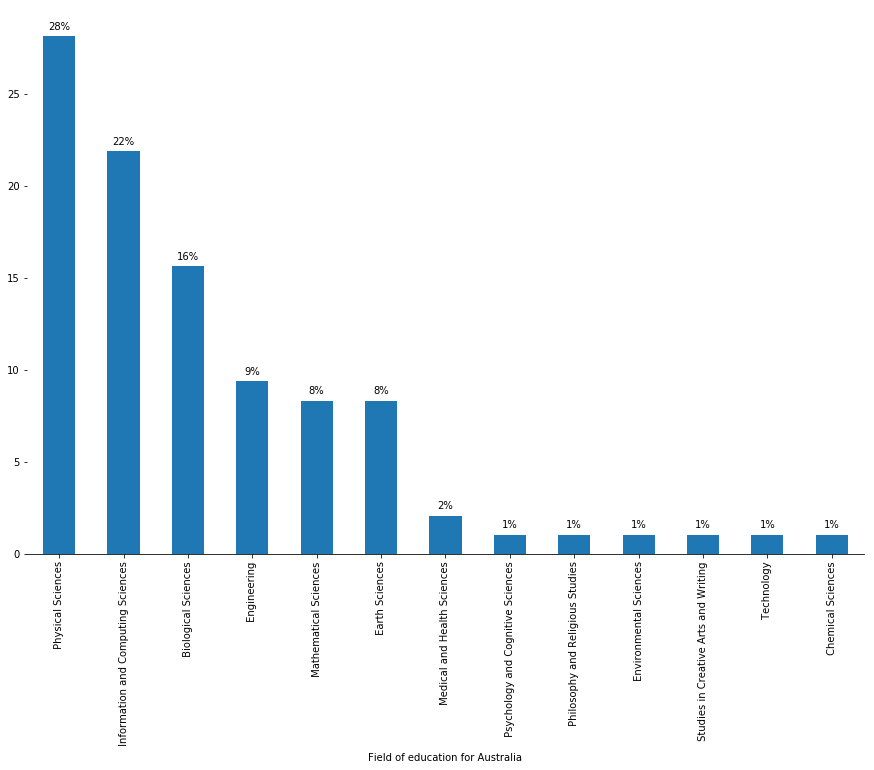

In [15]:
plot_cat_comparison(result, country, 'Field of education')

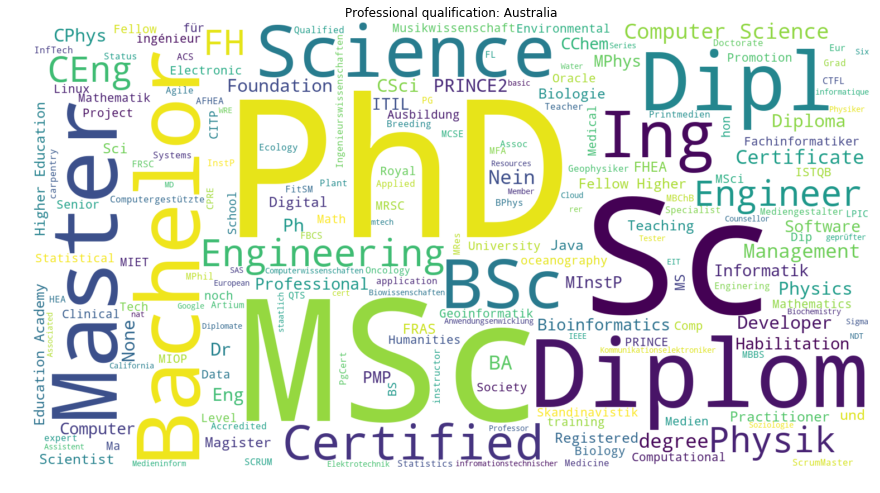

In [16]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### Germany

In [17]:
# Set up variables
country = 'Germany'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for Germany,,,
Computer Science,84,25.609756,8.994371
Physics and Astronomy,75,22.865854,-2.672608
Geography & Environmental Sciences,25,7.621951,0.545028
Biological Sciences,24,7.317073,-4.067542
Mathematics,24,7.317073,2.086304
Electrical & Electronic Engineering,18,5.487805,3.026266
Mechanical Engineering,11,3.353659,1.815197
Geology,9,2.743902,0.897749
Materials Technology,6,1.829268,NaN


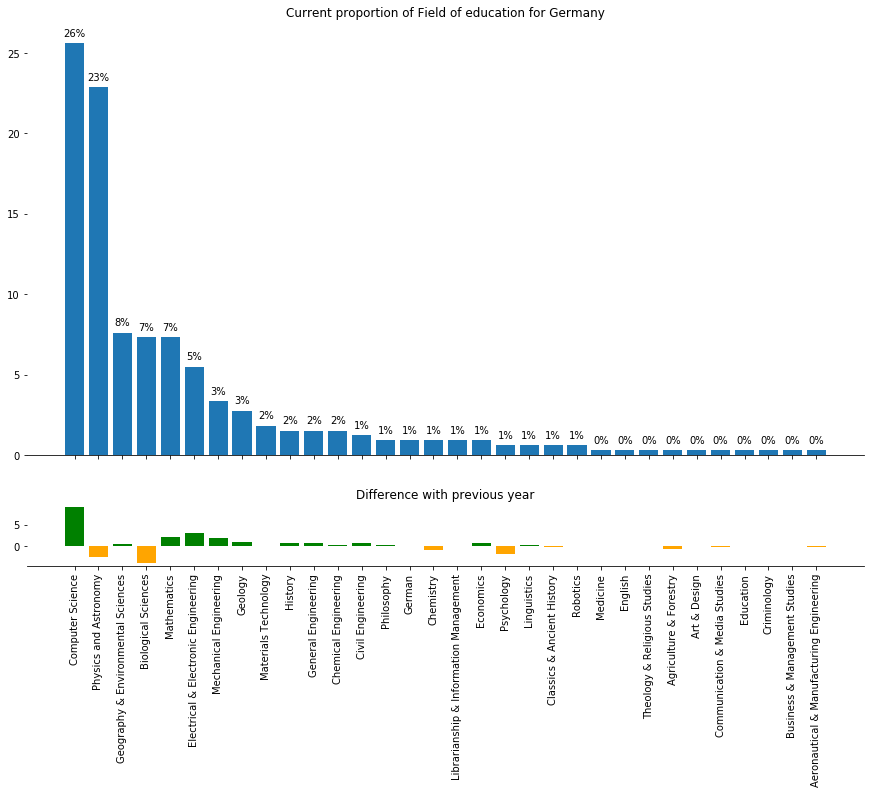

In [18]:
plot_cat_comparison(result, country, category)

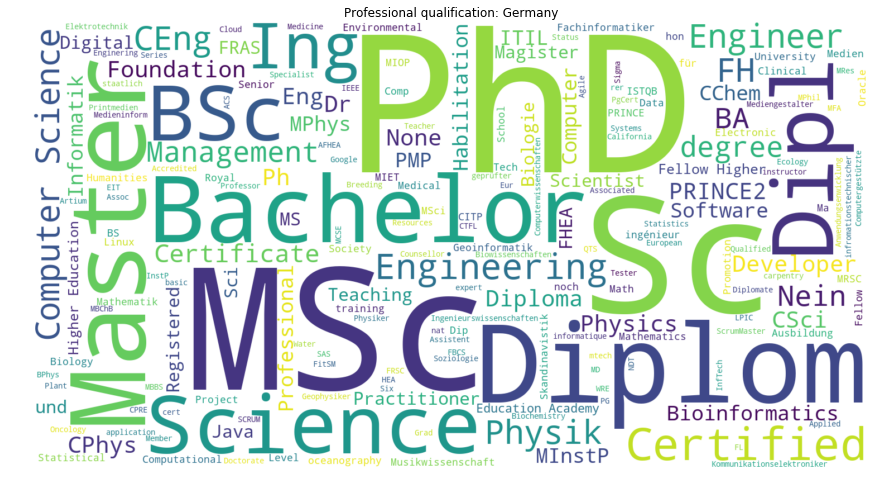

In [19]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### Netherlands

In [20]:
# Set up variables
country = 'Netherlands'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for Netherlands,,,
Physics and Astronomy,15,31.250000,7.250000
Computer Science,10,20.833333,-5.833333
Biological Sciences,7,14.583333,2.583333
Civil Engineering,2,4.166667,NaN
Chemistry,2,4.166667,-5.166667
Geography & Environmental Sciences,2,4.166667,-1.166667
Electrical & Electronic Engineering,2,4.166667,2.833333
Psychology,1,2.083333,NaN
Communication & Media Studies,1,2.083333,-1.916667


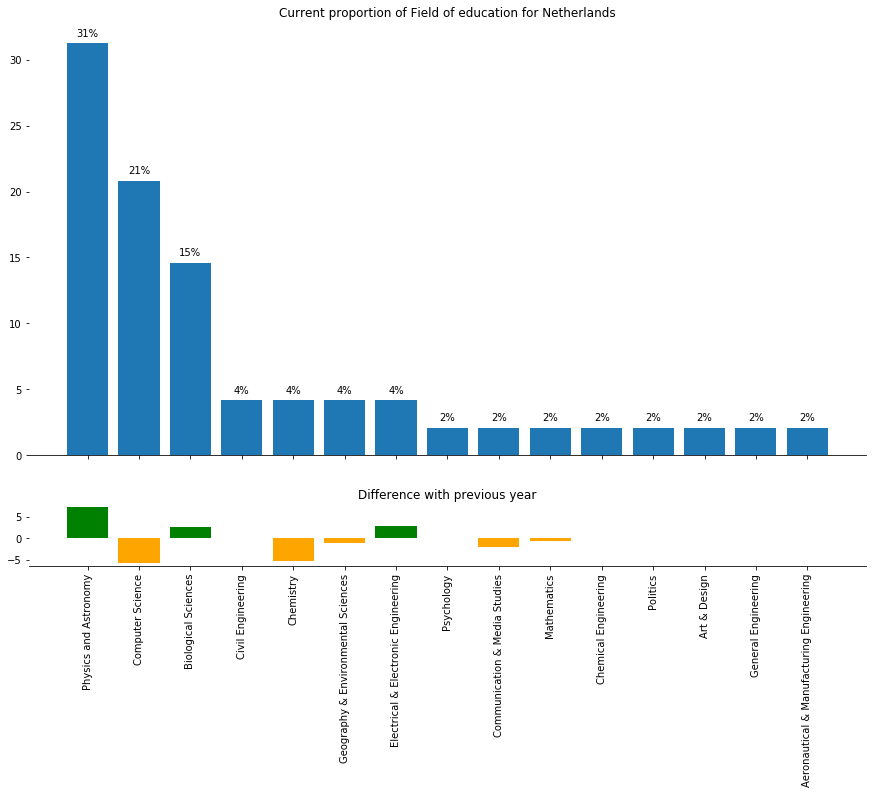

In [21]:
plot_cat_comparison(result, country, category)

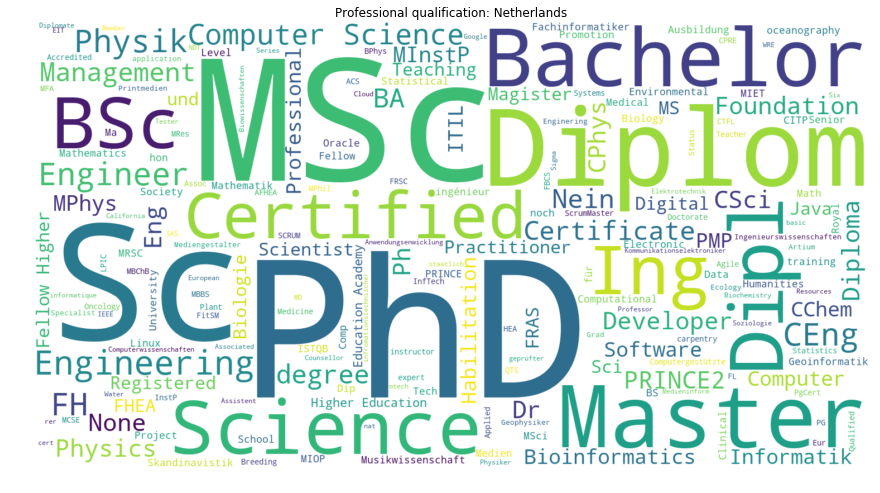

In [22]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### New Zealand

In [23]:
# Set up variables
country = 'New Zealand'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for New Zealand,,
Computer Science,11,29.729730
Biological Sciences,7,18.918919
Physics and Astronomy,4,10.810811
Mathematics,4,10.810811
Business & Management Studies,2,5.405405
Mechanical Engineering,2,5.405405
Electrical & Electronic Engineering,2,5.405405
Geography & Environmental Sciences,1,2.702703
Civil Engineering,1,2.702703


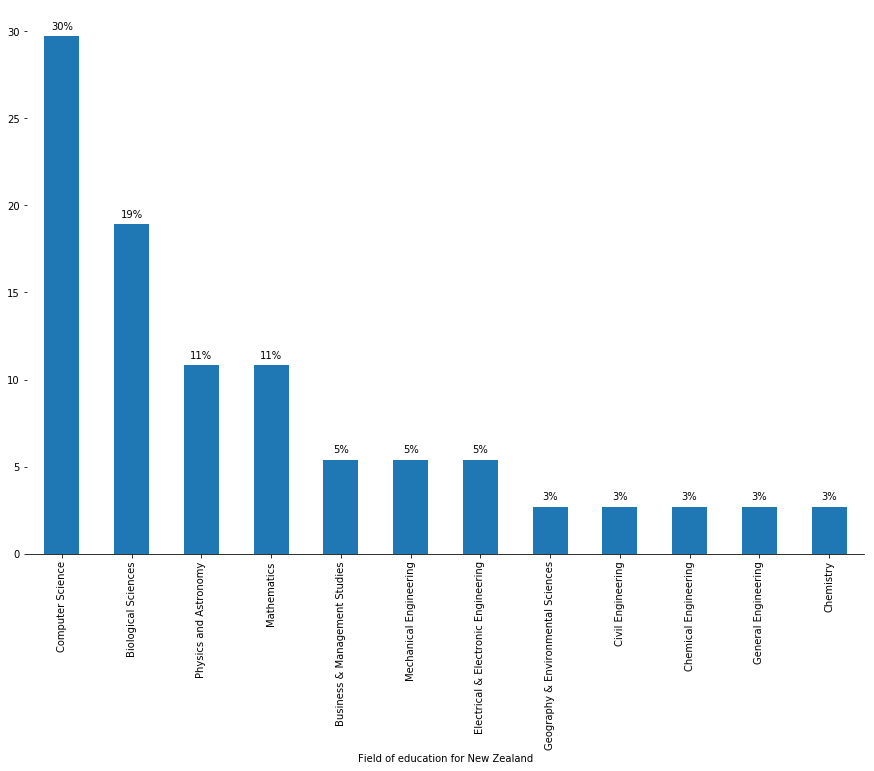

In [24]:
plot_cat_comparison(result, country, category)

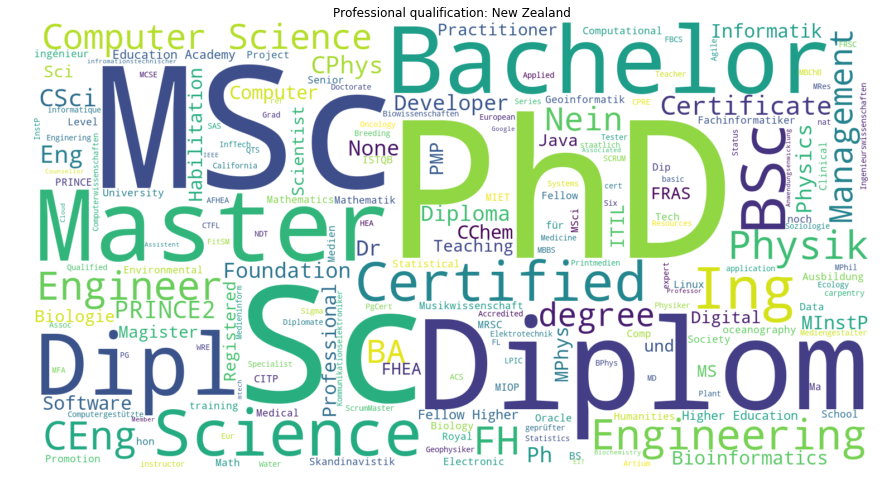

In [25]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### South Africa

In [26]:
# Set up variables
country = 'South Africa'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for South Africa,,,
Computer Science,10,45.454545,40.191388
Biological Sciences,4,18.181818,NaN
Mathematics,3,13.636364,NaN
Psychology,1,4.545455,NaN
Business & Management Studies,1,4.545455,NaN
Communication & Media Studies,1,4.545455,NaN
Economics,1,4.545455,-0.717703
Physics and Astronomy,1,4.545455,-58.612440


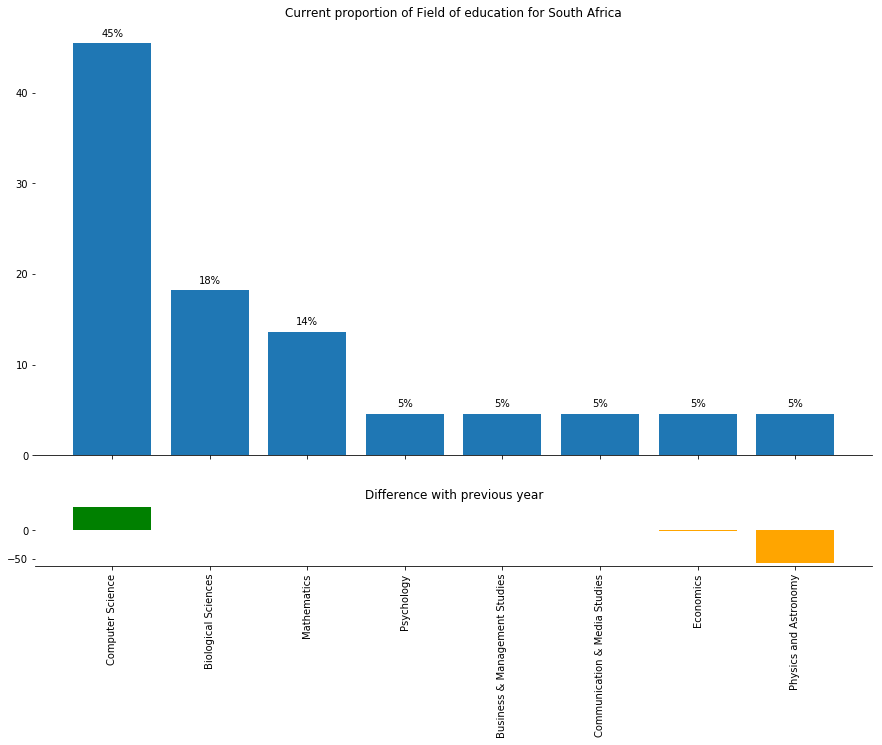

In [27]:
plot_cat_comparison(result, country, category)

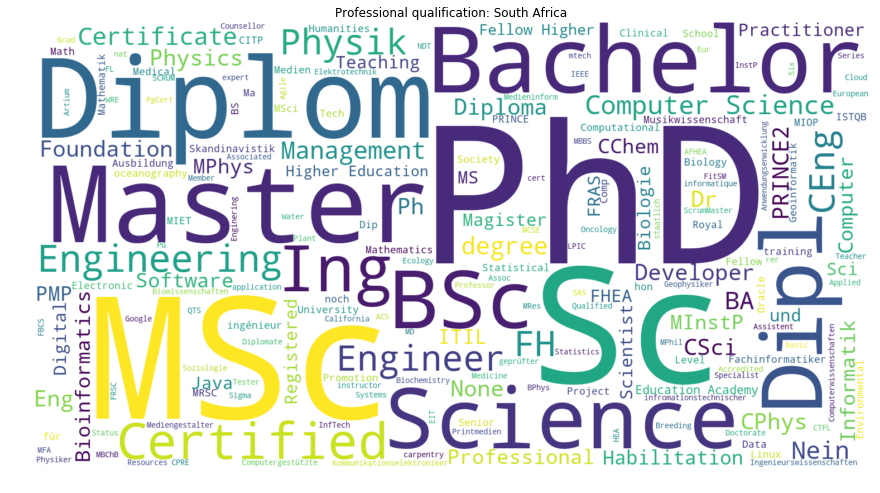

In [28]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### United Kingdom

In [29]:
# Set up variables
country = 'United Kingdom'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for United Kingdom,,,
Physics and Astronomy,80,34.334764,6.171499
Computer Science,56,24.034335,-2.904441
Biological Sciences,27,11.587983,5.465534
Mathematics,18,7.725322,-0.029780
Chemistry,12,5.150215,-1.380398
Geography & Environmental Sciences,11,4.721030,0.639397
Electrical & Electronic Engineering,6,2.575107,-0.690199
Geology,4,1.716738,0.492248
General Engineering,4,1.716738,0.492248


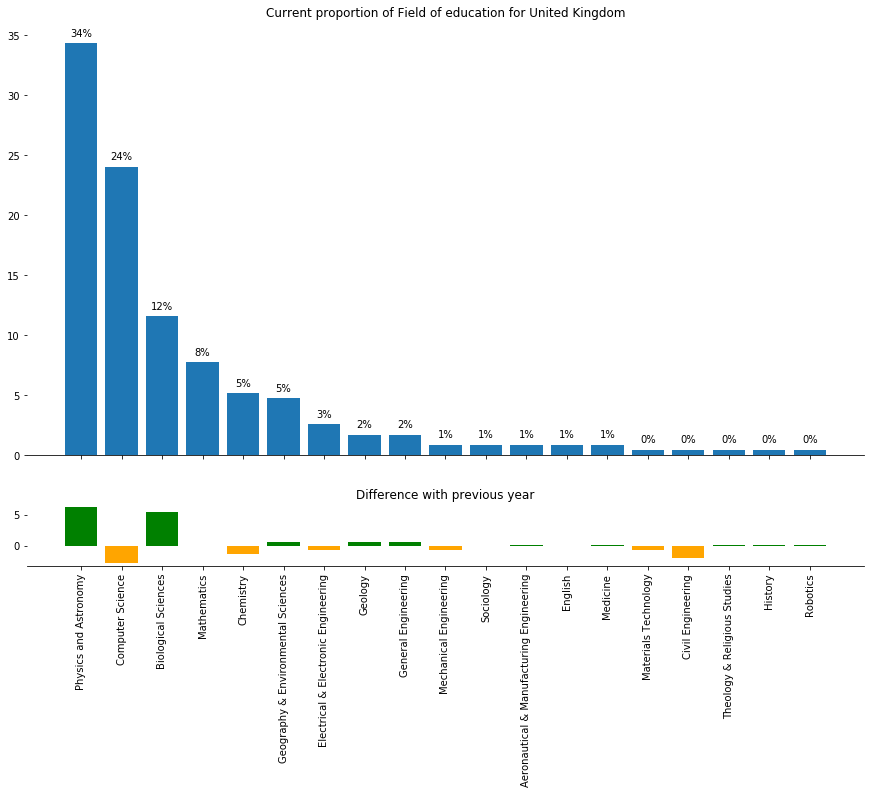

In [30]:
plot_cat_comparison(result, country, category)

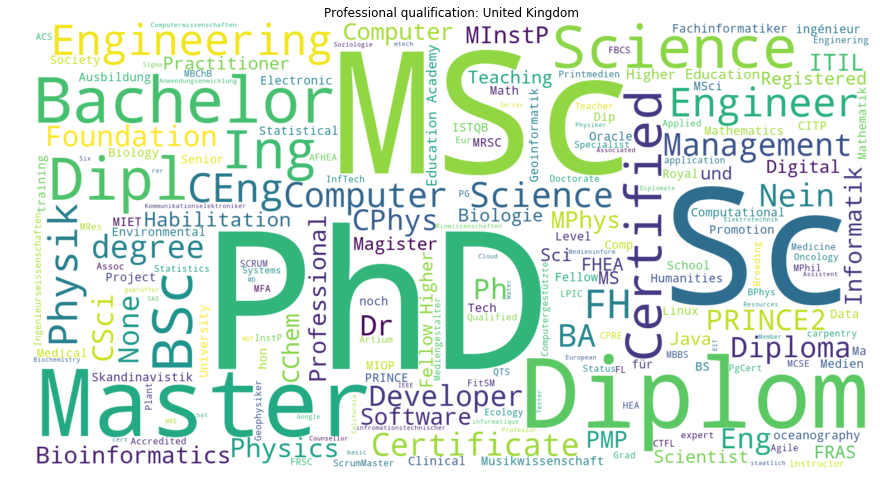

In [31]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### United States

In [32]:
# Set up variables
country = 'United States'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for United States,,,
Physics and Astronomy,44,30.344828,16.234398
Computer Science,38,26.206897,1.053522
Biological Sciences,14,9.655172,-5.068754
Mathematics,13,8.965517,3.444045
Electrical & Electronic Engineering,6,4.137931,1.070446
Geography & Environmental Sciences,4,2.758621,2.145124
Chemical Engineering,2,1.379310,-0.461180
Materials Technology,2,1.379310,NaN
Music,2,1.379310,0.765813


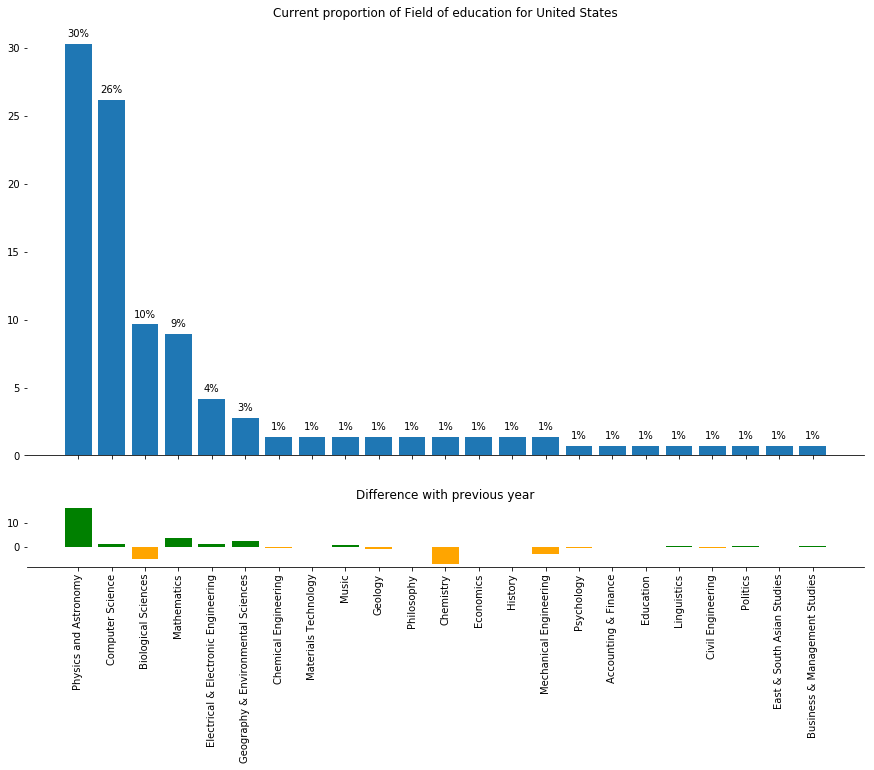

In [33]:
plot_cat_comparison(result, country, category)

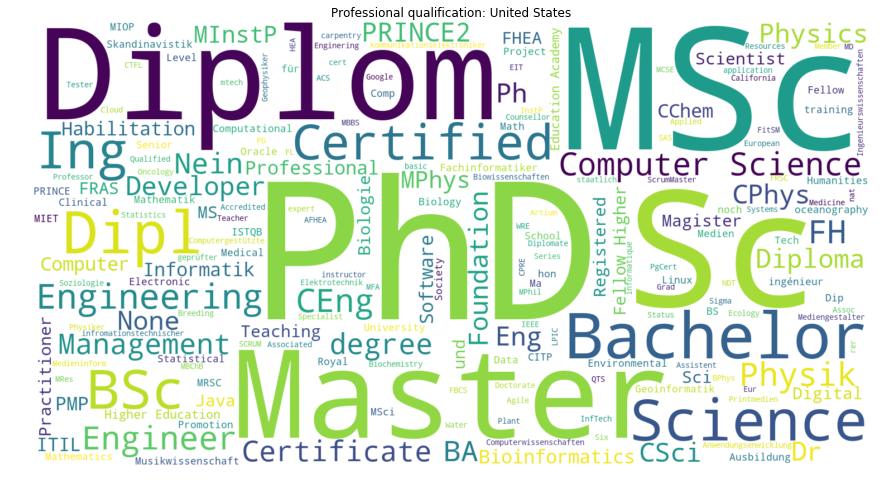

In [34]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### Rest of the world

In [35]:
# Set up variables
country = 'World'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for World,,
Physics and Astronomy,10,19.230769
Biological Sciences,9,17.307692
Computer Science,8,15.384615
Mathematics,6,11.538462
Geography & Environmental Sciences,3,5.769231
Electrical & Electronic Engineering,2,3.846154
Psychology,2,3.846154
Education,2,3.846154
Accounting & Finance,1,1.923077


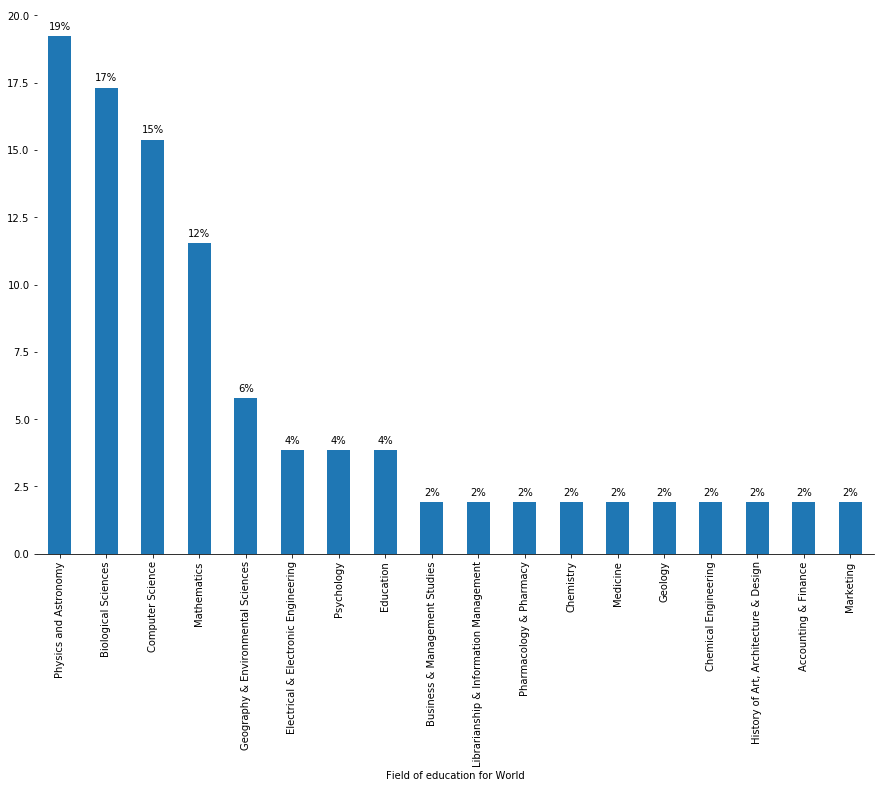

In [36]:
plot_cat_comparison(result, country, category)

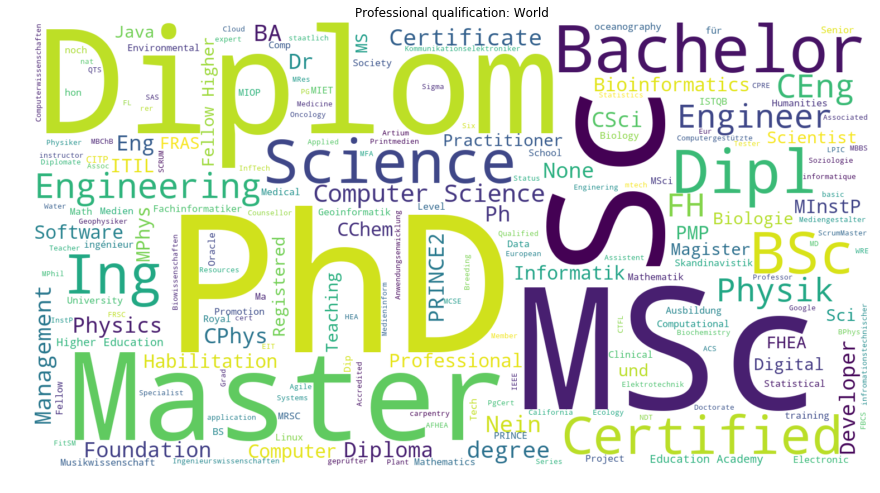

In [37]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

### Comparison between countries

In [38]:
# Count the values per countries
#df_edu_comparison = df_edu_field.groupby('Country')['Academic field'].value_counts().rename('Total count').reset_index()

# Add a percentage of each type of diploma per countries
#df_edu_comparison['Percentage per countries'] = (df_edu_comparison['Total count'] / df_edu_comparison.groupby('Country')['Total count'].transform('sum')*100)

# Display the results
#df_edu_comparison

In [39]:
#fig, ax = plt.subplots()
#df_plot = df_edu_comparison.pivot(index='Country', 
#                        columns='Academic field', 
#                        values='Percentage per countries')

#df_plot.plot(kind='barh',
#                  title='Percentage of academic field per country',
#                  grid=False, ax=ax, stacked=True)

#ax.set(xlabel="Country", ylabel="Percentage")

#ax.invert_yaxis()  # when barh option, the bars are inverted 
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False) 
# Put a legend below current axis
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#          fancybox=True, shadow=True, ncol=5)
#for p in ax.patches:
#    if int(round(p.get_width())) >= 5:
#        ax.annotate('{}%'.format(str(int(round(p.get_width())))), 
#                    (p.get_x() + int(p.get_width())/2., p.get_y()+ int(p.get_height())/2.),
#                    ha='center')

#plt.show();